# Employee Attrition and Performance

In [2]:
#Packages & Libraries
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import squarify

import warnings
warnings.filterwarnings('ignore')

In [3]:
#check files
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        data_path = os.path.join(dirname, filename)
        print(data_path)

../data/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [4]:
custom_palette =["#269ffb", "#26e7a5", "#febb3b", "#ff6077", "#c0d775", "#fb8126", "#e72667", "#45ffe4"]
sns.set_palette(custom_palette)

In [5]:
# custom style 
plt.rcParams['axes.facecolor'] = 'white'     # background color
plt.rcParams['grid.color'] = 'lightgray'     # grid color
plt.rcParams['axes.edgecolor'] = 'lightgray' # axes color
plt.rcParams['axes.labelcolor'] = 'black'    # label color
plt.rcParams['xtick.color'] = 'black'        # xtick color
plt.rcParams['ytick.color'] = 'black'        # ytick color
plt.rcParams['axes.grid'] = True             # enable grid
plt.rcParams['axes.titlesize'] = 15         # title size
plt.rcParams['axes.titleweight'] = 'bold'  # title weight
plt.rcParams['axes.labelsize'] = 12          # label size


sns.set_style("whitegrid")


## EDA

In [6]:
#importing data
emp_df = pd.read_csv(data_path)

In [7]:
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 1. General Information

In [8]:
# shape of the dataset
emp_df.shape

(1470, 35)

In [9]:
#variable info
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
#number of categorical and numerical attributes
print("Count of each data type :\n",emp_df.dtypes.value_counts())

Count of each data type :
 int64     26
object     9
dtype: int64


In [11]:
#missing values
emp_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
#unique
emp_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [13]:
# summary numerical data
emp_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
# summary categorical data
emp_df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


- There are 1470 records and 35 attributes in the dataset. 
- It contains 26 numerical attributes and 9 categorical attributes.
- There are no missing values in the data.
- Attributes that can drop beacuse thy are not relevant or have no variablity --> (EmployeeCount, EmployeeNumber, Over18 and StandardHours)

## 2. Distribution of the Attrition (target variable)

In [15]:
emp_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

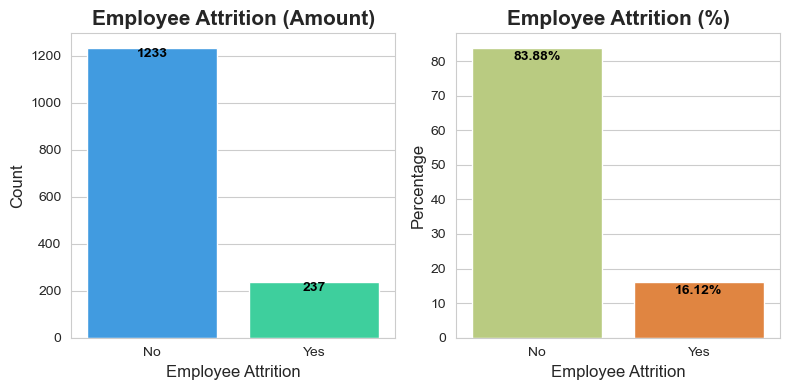

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

# Count
attrition_count = emp_df['Attrition'].value_counts().reset_index()
attrition_count.columns = ['Attrition', 'Count']

sns.barplot(data=attrition_count, x='Attrition', y='Count', palette=custom_palette, ax = ax1)
for index, value in enumerate(attrition_count['Count']):
    ax1.text(index, value - 1, f"{value:}", ha='center', va='top', color='black', fontweight='bold')
ax1.set_title("Employee Attrition (Amount)")
ax1.set_xlabel("Employee Attrition")
ax1.set_ylabel("Count")

# Percentage 
attrition_count['Percentage'] = (attrition_count['Count'] / emp_df.shape[0]) * 100
sns.barplot(data=attrition_count, x='Attrition', y='Percentage', palette=custom_palette[4:6], ax= ax2)
for index, value in enumerate(attrition_count['Percentage']):
    ax2.text(index, value - 1, f"{value:.2f}%", ha='center', va='top', color='black',  fontweight='bold')
ax2.set_title("Employee Attrition (%)")
ax2.set_xlabel("Employee Attrition")
ax2.set_ylabel("Percentage")

plt.tight_layout()

fig.show()

- Out of 1740 employees, 1233 (83.88%) did not leave the organization, while 237 (16.12%) did.
- This is a **imbalanced dataset.**

## 3. Age Distribution

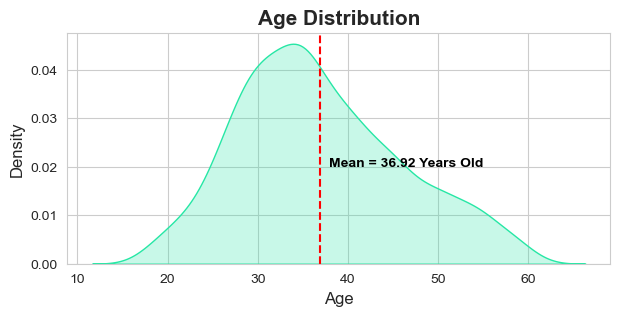

In [17]:
# Age Distribution
plt.figure(figsize=(7, 3))
sns.kdeplot(emp_df['Age'],color = "#26e7a5", shade=True)
plt.axvline(emp_df['Age'].mean(), color='red', linestyle='--')
plt.text(emp_df['Age'].mean() + 1, 0.02, f"Mean = {emp_df['Age'].mean():.2f} Years Old", color='black', fontsize=10, fontweight='bold')
plt.title("Age Distribution")
plt.show()

- Average age of a employee is 36 years.

### 3.1 Effect of Age on attrition 

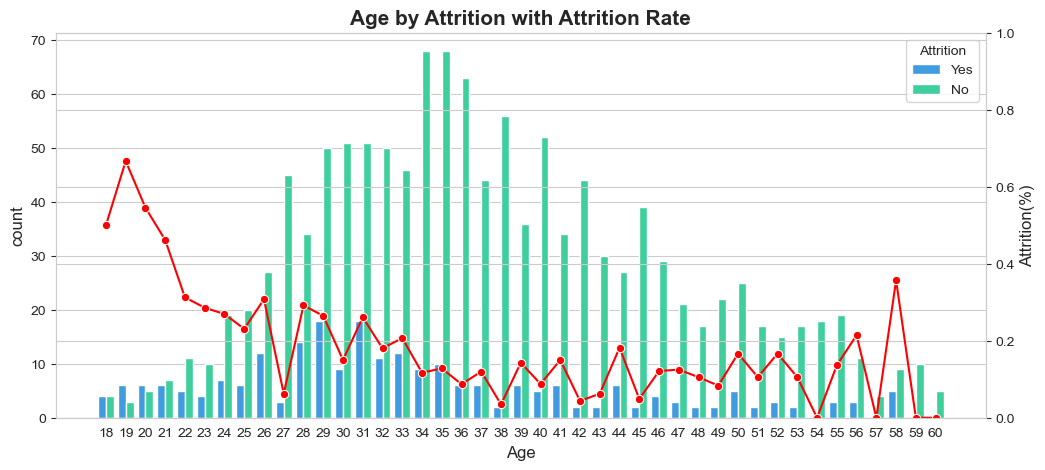

In [18]:
plt.figure(figsize=(12, 5))
temp_df = emp_df.copy()  
temp_df['Attrition_new'] = temp_df['Attrition'].replace({'Yes': 1, 'No': 0})

ax1 = sns.countplot(x='Age', hue='Attrition', data=temp_df, palette=custom_palette)

attrition_rate = temp_df.groupby('Age')['Attrition_new'].mean().reset_index()

ages = attrition_rate['Age']
positions = []
for age in ages:
    positions.append(ax1.patches[np.where(ages == age)[0][0]].get_x() + 0.4)  
ax2 = ax1.twinx()
sns.lineplot(x=positions, y='Attrition_new', data=attrition_rate, ax=ax2, color='red', marker="o")
ax2.set_ylim(0, 1)  
ax2.set_ylabel('Attrition Rate')

plt.title('Age by Attrition with Attrition Rate')
plt.xlabel('Age')
plt.ylabel('Attrition(%)')
plt.show()

- The highest attrition rate is observed among employees aged between 18 and 21 years. Between the ages of 27 and 50, the percentage of employees leaving the company is lower. However, there's an increase in attrition for employees over the age of 60. It's plausible that younger employees, possibly due to the pressures of work or a lack of commitment, tend to leave more frequently. On the other hand, the higher attrition rate among those over 60 might be attributed to health concerns or the natural progression towards retirement.

## 4. Gender Analysis

In [19]:
emp_df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

- There are 882 Males and 588 Females.

### 4.1 Age Distribution by Gender

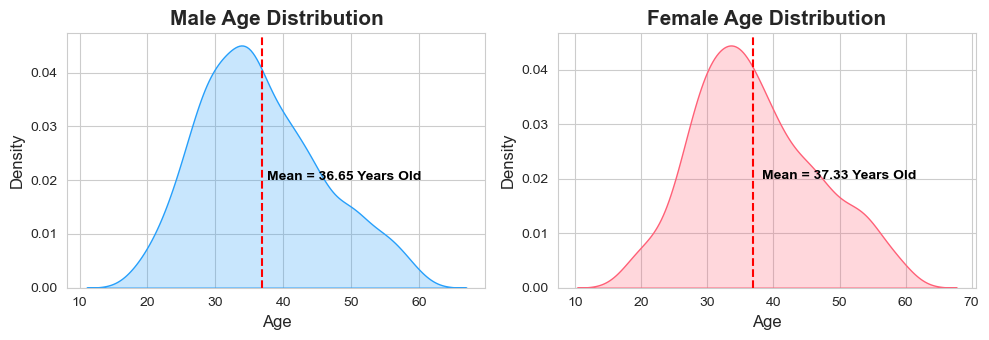

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3.5))

#  Male Age Distribution
sns.kdeplot(emp_df[emp_df['Gender']=='Male']['Age'],color = "#269ffb", shade=True, ax = ax1)
ax1.axvline(emp_df['Age'].mean(), color='red', linestyle='--')
ax1.text(emp_df[emp_df['Gender']=='Male']['Age'].mean() + 1, 0.02, f"Mean = {emp_df[emp_df['Gender']=='Male']['Age'].mean():.2f} Years Old", color='black', fontsize=10, fontweight='bold')
ax1.set_title("Male Age Distribution")

#  Female Age Distribution
sns.kdeplot(emp_df[emp_df['Gender']=='Female']['Age'],color = "#ff6077", shade=True, ax = ax2)
ax2.axvline(emp_df['Age'].mean(), color='red', linestyle='--')
ax2.text(emp_df[emp_df['Gender']=='Female']['Age'].mean() + 1, 0.02, f"Mean = {emp_df[emp_df['Gender']=='Female']['Age'].mean():.2f} Years Old", color='black', fontsize=10,  fontweight='bold')
ax2.set_title("Female Age Distribution")

plt.tight_layout()
plt.show()

- The average age of a females is 37.33 and for a males is 36.65 and both distributions are similar. 

### 4.2 Job Satisfaction Distribution by Gender and Attrition

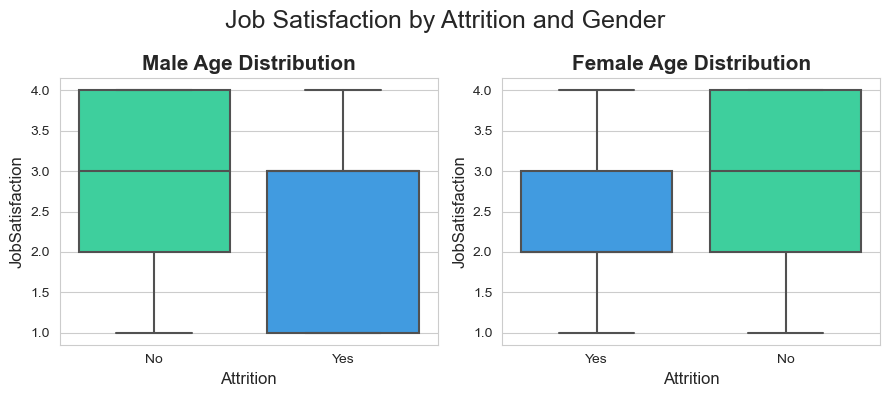

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
                              
#  Male Age Distribution
sns.boxplot(data=emp_df[emp_df['Gender']=='Male'], x='Attrition', y='JobSatisfaction',  palette={"Yes": "#269ffb", "No": "#26e7a5"}, ax= ax1)
ax1.set_title("Male Age Distribution")

#  Female Age Distribution
sns.boxplot(data=emp_df[emp_df['Gender']=='Female'], x='Attrition', y='JobSatisfaction', palette={"Yes": "#269ffb", "No": "#26e7a5"}, ax= ax2)
ax2.set_title("Female Age Distribution")
fig.suptitle('Job Satisfaction by Attrition and Gender', size = 18)

plt.tight_layout()
plt.show()

- For those who stayed with the organization, job satisfaction levels were same. However, among those who left, 
females have a lower satisfaction compared to males.

### 4.3 Monthly Income by Gender

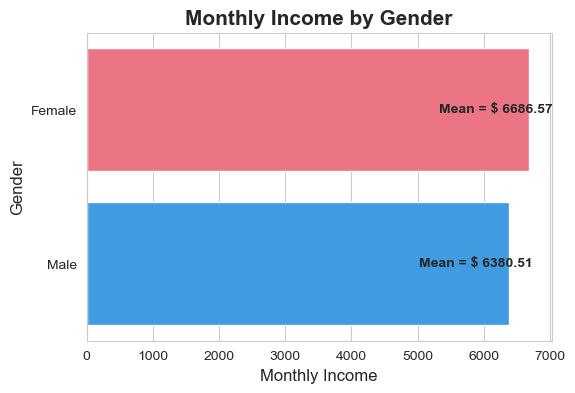

In [22]:
plt.figure(figsize=(6, 4))

palette = {
    'Male': '#269ffb',
    'Female': '#ff6077'
}

ax = sns.barplot(data=emp_df, x='MonthlyIncome', y='Gender', palette=palette, ci=None)
for p in ax.patches:
    width = p.get_width()
    ax.text(width - 500, p.get_y() + p.get_height() / 2, 'Mean = $ {:1.2f}'.format(width), ha="center", va="center", fontsize=10,fontweight = 'bold')

plt.title("Monthly Income by Gender")
plt.xlabel("Monthly Income")
plt.ylabel("Gender")
plt.show()

- The average salaries for males and females are closely aligned, with males earning an average of `$`6380.51 and females earning`$`6686.57.

### 3.4 Presence by Department

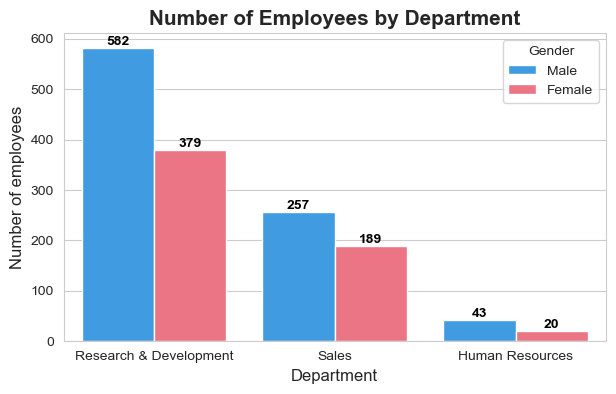

In [23]:
grouped_df = emp_df.groupby(['Department', 'Gender']).size().sort_values(ascending=False).reset_index(name='amount')

plt.figure(figsize=(7, 4))

ax = sns.barplot(data=grouped_df, x='Department', y='amount', hue='Gender', palette=palette)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., 
            p.get_height(), 
            f'{int(p.get_height())}',  ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

plt.title("Number of Employees by Department")
plt.xlabel("Department")
plt.ylabel("Number of employees")
plt.show()

-  There are a higher number of males in the three departments.

## 5. Distribution of Job Satisfaction

([<matplotlib.axis.XTick at 0x1b46dcc38b0>,
 [Text(1, 0, '1 : Low'),
  Text(2, 0, '2: Medium'),
  Text(3, 0, '3: High'),
  Text(4, 0, '4 : Very High')])

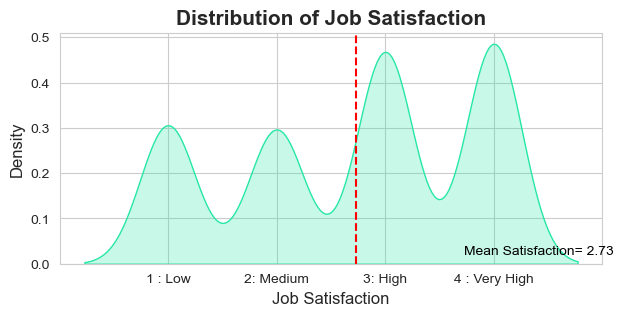

In [24]:
#  Female Age Distribution
plt.figure(figsize=(7,3))
sns.kdeplot(emp_df['JobSatisfaction'],color = "#26e7a5", shade=True)
plt.axvline(emp_df['JobSatisfaction'].mean(), color='red', linestyle='--')
plt.text(emp_df['JobSatisfaction'].mean() + 1, 0.02, f"Mean Satisfaction= {emp_df['JobSatisfaction'].mean():.2f}", color='black')
plt.title("Distribution of Job Satisfaction") 
plt.xlabel("Job Satisfaction")
plt.ylabel("Density")
xticks_custom = [1, 2, 3, 4]
xtick_labels = ['1 : Low', '2: Medium', '3: High', '4 : Very High']
plt.xticks(xticks_custom, xtick_labels)

- An Employeee has average 2.73 satisfaction abouth there job. Which means most the employees have a High satisfaction about there jobs.

## 6. Eductaion Analysis

### 6.1 Education Level Analysis

In [25]:
#Eductaion Level
emp_df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

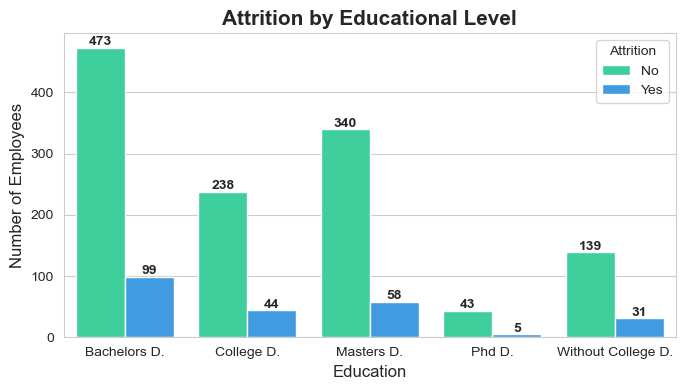

In [26]:
education_map = {
    1: "Without College D.",
    2: "College D.",
    3: "Bachelors D.",
    4: "Masters D.",
    5: "Phd D."
}
emp_df['Educational_Levels'] = emp_df['Education'].map(education_map)

agg_data = emp_df.groupby(['Educational_Levels', 'Attrition']).size().reset_index(name='n')

plt.figure(figsize=(7, 4))
ax = sns.barplot(data=agg_data, y='n', x='Educational_Levels', hue='Attrition', palette={"Yes": "#269ffb", "No": "#26e7a5"})

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize =10, fontweight = 'bold')

plt.title("Attrition by Educational Level")
plt.xlabel("Education")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()

- Employees with bachelors Degrees have the highest attrition.

### 6.2 Education Field Analysis

In [27]:
emp_df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

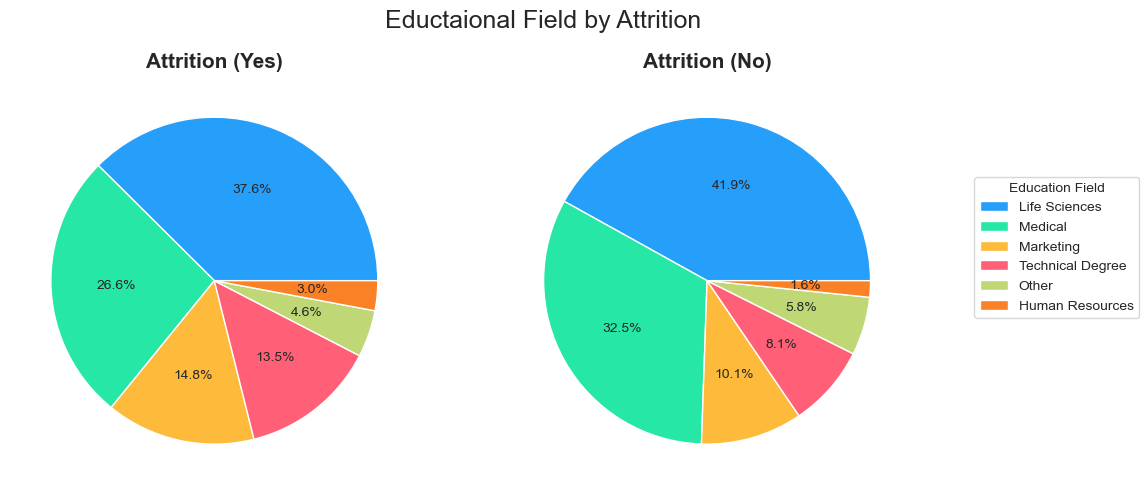

In [28]:
grouped = emp_df.groupby(['EducationField', 'Attrition']).size().reset_index(name='count')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Attrition = 'Yes'
attrition_yes = grouped[grouped['Attrition'] == 'Yes'].sort_values(by='count', ascending=False)

ax1.pie(attrition_yes['count'], labels=None, autopct='%1.1f%%')
ax1.set_title('Attrition (Yes)')

# Attrition = 'No'
attrition_no = grouped[grouped['Attrition'] == 'No'].sort_values(by='count', ascending=False)

ax2.pie(attrition_no['count'], labels=None, autopct='%1.1f%%')
ax2.set_title('Attrition (No)')

# legend 
labels = list(attrition_yes['EducationField']) + list(attrition_no['EducationField'])
labels = list(dict.fromkeys(labels)) 
fig.legend(handles=ax1.patches, labels=labels, loc="center right", title="Education Field")

plt.suptitle("Eductaional Field by Attrition", size = 18)
plt.tight_layout()
plt.subplots_adjust(right=0.85)

plt.show()


- Most of the employees left the company are from Life Sceinces. Seems to be a similar attrition among Fields.

## 7. Impact of Monthly Income

### 7.1 Average Income by Job Satisfaction and Attrition

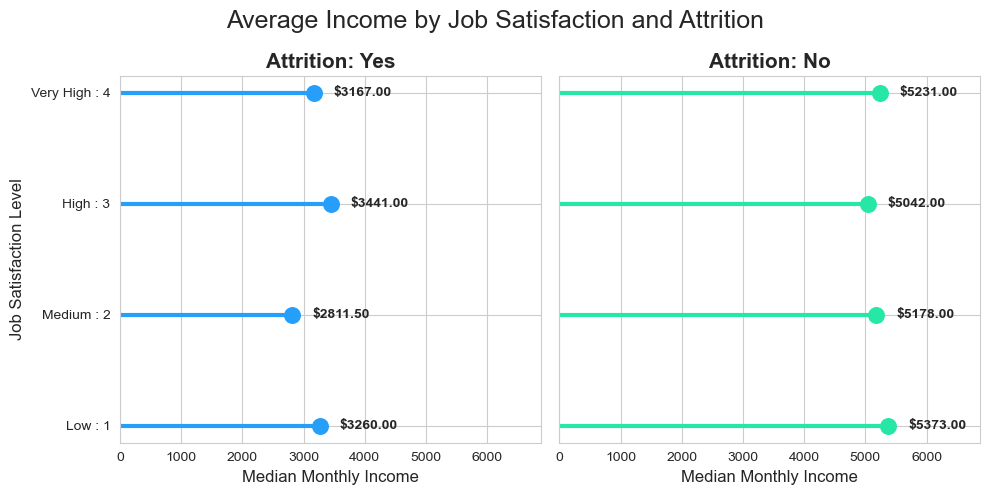

In [29]:
grouped = emp_df.groupby(['JobSatisfaction', 'Attrition']).MonthlyIncome.median().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

def plot_lollipop(ax, attrition_status, color):
    subset = grouped[grouped['Attrition'] == attrition_status]
    ax.hlines(y=subset['JobSatisfaction'], xmin=0, xmax=subset['MonthlyIncome'], color=color, lw=3)
    ax.scatter(subset['MonthlyIncome'], subset['JobSatisfaction'], color=color, s=125, label='Median Income')
    
    for _, row in subset.iterrows():
        ax.text(row['MonthlyIncome'] + 800,  
                row['JobSatisfaction'],
                f"${row['MonthlyIncome']:.2f}",
                ha='center', va='center', fontsize= 10, fontweight = 'bold')
    
    ax.set_title(f'Attrition: {attrition_status}')
    ax.set_xlim(0, grouped['MonthlyIncome'].max() + 1500)  
    ax.set_xlabel('Median Monthly Income')
    
plot_lollipop(ax1, 'Yes', '#269ffb')
plot_lollipop(ax2, 'No', '#26e7a5')
xticks_custom = [1, 2, 3, 4]
xtick_labels = ['Low : 1', 'Medium : 2', 'High : 3', 'Very High : 4']
ax1.set_yticks(xticks_custom, xtick_labels)
ax1.set_ylabel('Job Satisfaction Level')
plt.suptitle("Average Income by Job Satisfaction and Attrition", size = 18)
plt.tight_layout()
plt.show()

- Lower the job satisfaction the wider the gap by attrition status in the levels of income. 

### 7.2 Average Income by Department

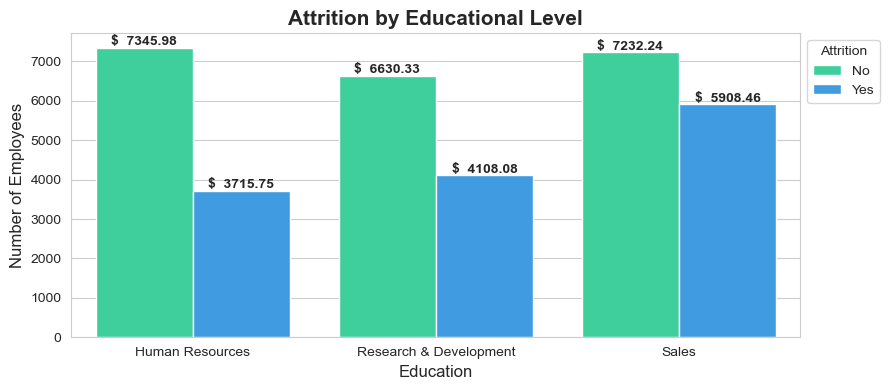

In [30]:
agg_data = emp_df.groupby(['Department', 'Attrition']).MonthlyIncome.mean().reset_index(name='MonthlyIncome')

plt.figure(figsize=(9, 4))
ax = sns.barplot(data=agg_data, y='MonthlyIncome', x='Department', hue='Attrition', palette={"Yes": "#269ffb", "No": "#26e7a5"})

for p in ax.patches:
    ax.annotate(f"$ {format(p.get_height(),' .2f')}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize =10, fontweight = 'bold')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title = "Attrition")    
plt.title("Attrition by Educational Level")
plt.xlabel("Education")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()

- There is a huge differences in each department by attrition status.

## 8. Over Time

### 8.1 Level of Attrition by Overtime Status

In [31]:
filtered_df = emp_df[emp_df['Attrition'] == "Yes"]
grouped = filtered_df.groupby(['Attrition', 'OverTime']).size().reset_index(name='n')
grouped['proportion'] = (grouped['n'] / grouped['n'].sum() * 100).round(2)

print(grouped)

  Attrition OverTime    n  proportion
0       Yes       No  110       46.41
1       Yes      Yes  127       53.59


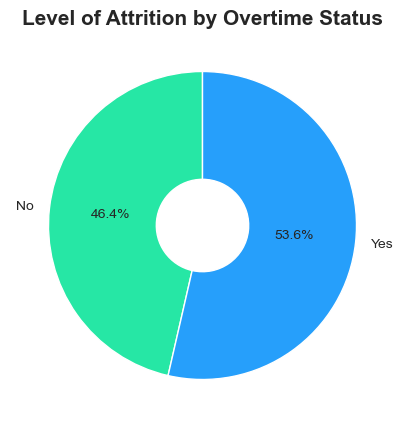

In [32]:
plt.figure(figsize=(8, 5))
plt.pie(grouped['proportion'], labels=grouped['OverTime'],autopct='%1.1f%%', colors= ["#26e7a5", "#269ffb"], startangle=90, wedgeprops=dict(width=0.7))
plt.title("Level of Attrition by Overtime Status")
plt.show()

- Most of emolyees who left company have work overtime.

## 9. Job Role

### 9.1 Number of Employees in each Job Role

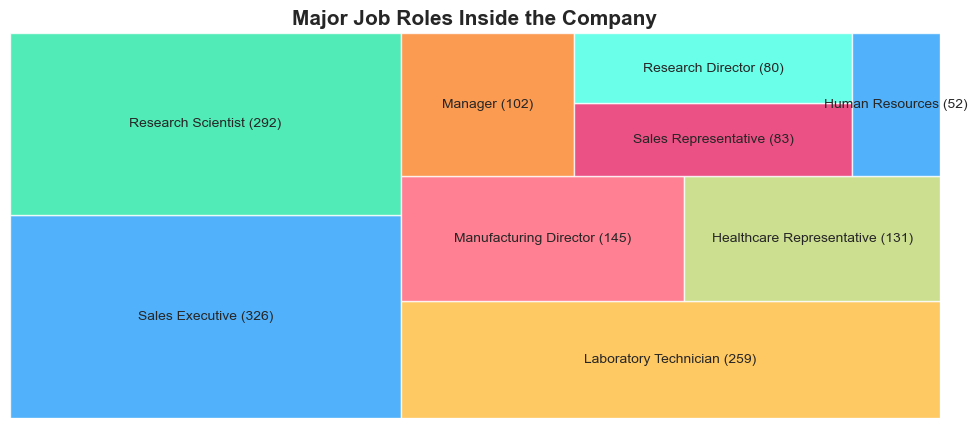

In [33]:
# Grouping and counting the employees by JobRole
role_counts = emp_df['JobRole'].value_counts().reset_index()
role_counts.columns = ['JobRole', 'amount']
plt.figure(figsize=(12, 5))
labels = ["{} ({})".format(role, amount) for role, amount in zip(role_counts['JobRole'],role_counts['amount'])]

squarify.plot(sizes=role_counts['amount'], label=labels, color=custom_palette, alpha=0.8, text_kwargs={'fontsize':10})
plt.title("Major Job Roles Inside the Company")
plt.axis('off')
plt.show()

- Among all job positions, Sales and Research Scientist roles have the most employees. 

### 9.2 Salary by Job Role

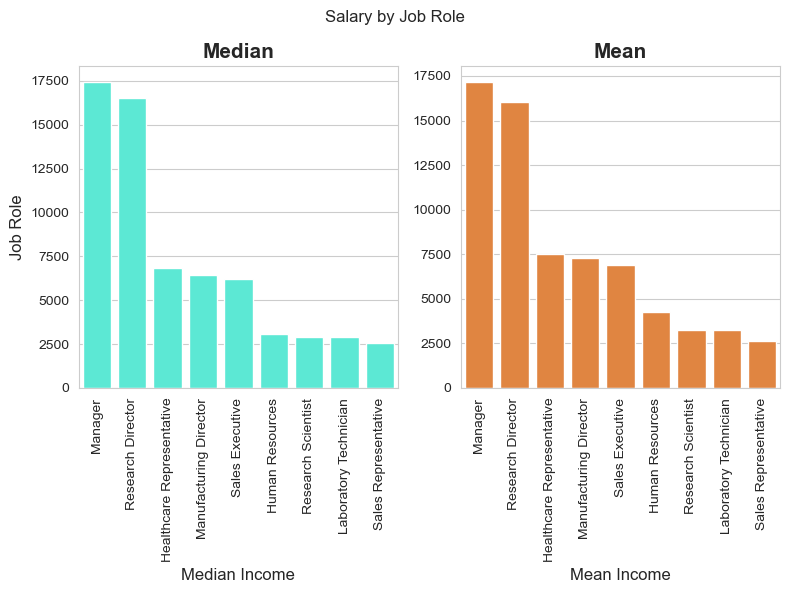

In [34]:
job_sal = emp_df.groupby('JobRole')['MonthlyIncome'].agg(['median', 'mean']).reset_index()

job_sal_sorted_median = job_sal.sort_values(by='median', ascending=False)

job_sal_sorted_mean = job_sal.sort_values(by='mean', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

# Median MonthlyIncome 
sns.barplot(data=job_sal_sorted_median, x='JobRole', y='median', ax=ax1, color="#45ffe4")
ax1.set_title('Median')
ax1.set_xlabel('Median Income')
ax1.set_ylabel('Job Role')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Mean MonthlyIncome
sns.barplot(data=job_sal_sorted_mean, x='JobRole', y='mean', ax=ax2, color="#fb8126")
ax2.set_title('Mean')
ax2.set_xlabel('Mean Income')
ax2.set_ylabel('')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.suptitle("Salary by Job Role")

plt.tight_layout()

plt.show()

- Among all job positions, Managers and Research Directors have the highest salary on average. 

### 9.3 Attrition by Job Role 

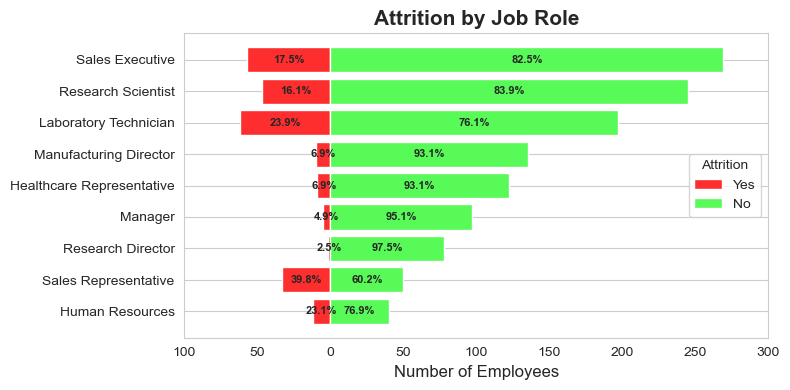

In [35]:
attrition_counts = emp_df.groupby(['JobRole', 'Attrition']).size().unstack()

total = attrition_counts.sum(axis=1)
attrition_counts['Yes_pct'] = (attrition_counts['Yes'] / total) * 100
attrition_counts['No_pct'] = (attrition_counts['No'] / total) * 100

attrition_counts = attrition_counts.sort_values('No')

# pyramid plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(attrition_counts.index, -attrition_counts['Yes'], color='#FE2E2E', label='Yes')
ax.barh(attrition_counts.index, attrition_counts['No'], color='#58FA58', label='No')

for idx, row in attrition_counts.iterrows():
    ax.text(-row['Yes'] / 2, idx, f"{row['Yes_pct']:.1f}%", ha='center', va='center', fontsize=8, fontweight="bold")
    ax.text(row['No'] / 2, idx, f"{row['No_pct']:.1f}%", ha='center', va='center', fontsize=8, fontweight="bold")

ax.set_xlabel('Number of Employees')
ax.set_title('Attrition by Job Role')
ax.legend(loc="center right", title="Attrition")
ax.grid(axis="x")

ax.set_xticks(ax.get_xticks())
labels = [str(np.abs(int(label))) for label in ax.get_xticks()]
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()


- Sales Representatives, HealthCare Representatives and Managers have the highest attrition rates. 

## 10. Correlation Plot

In [36]:
emp_df = emp_df.drop(['EmployeeCount', 'StandardHours'], axis=1)

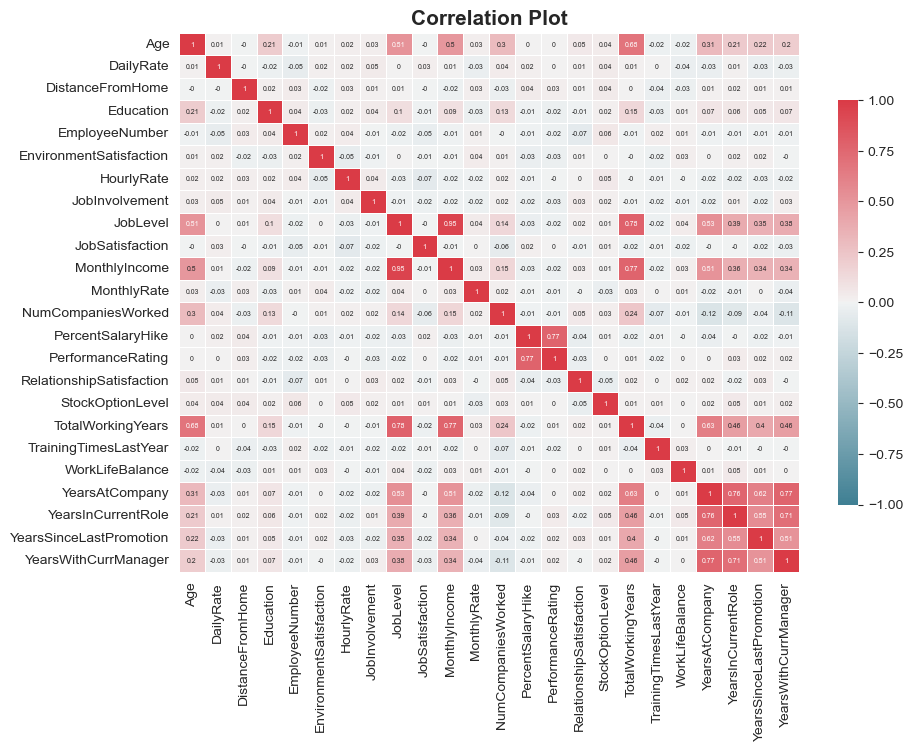

In [37]:
#correlation plt
numerical_columns = emp_df.select_dtypes(include=[np.number])
corr = numerical_columns.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 7))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            linewidths=.5, cbar_kws={"shrink": .75}, annot=np.around(corr, decimals=2) , annot_kws={"size": 5})

plt.title('Correlation Plot')
plt.show()

## 11. Conclusions

***Reasons why employees leaves the Company***

1. **No Overtime:** Employees without overtime tend to leave the organization more frequently. This could indicate that these employees seek a higher income or perhaps feel that their skills are underutilized.

2. **Monthly Income:** An employees's monthly salary plays a significant role in their decision to depart from the organization, commonly driven by the lure of a higher salary elsewhere.

3. **Age:** Employees who are aiming to retire will leave the organization.